In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv
/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv


In [2]:
df = pd.concat((pd.read_csv('/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv',nrows = 5000000,
                                                                                                           header = 'infer',
                                                                                                           parse_dates = ['event_time'],
                                                                                                           date_parser = pd.to_datetime,),
                pd.read_csv('/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv',nrows = 5000000,
                                                                                                           header = 'infer',
                                                                                                           parse_dates = ['event_time'],
                                                                                                           date_parser = pd.to_datetime,)))

In [3]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


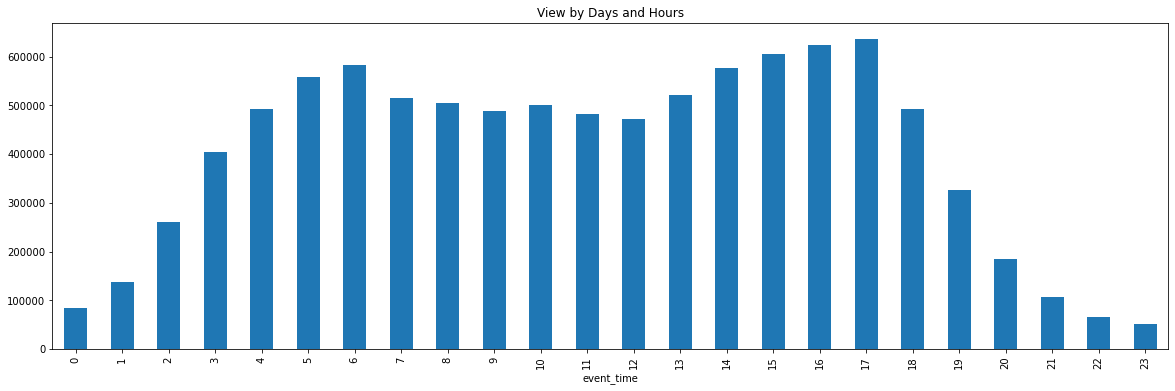

In [4]:
#In what part of the day is your store most visited?

df.reset_index(drop = True, inplace = True)
(df[(df.event_type=='view')].groupby([df['event_time'].dt.hour]).event_type.count()).plot.bar(figsize = (20,6),
                                                                                              title = 'View by Days and Hours')

**Please see the number of visits for the part of day plotted above. It seems like the users visit our online store mostly during 15:00, 16:00 and 17:00 for the data that we were able to read because we do not have a machine that able to read all data but we have concat the 5000000 rows for each month which means we can concat all raws but our machines are not able to do that, they cruch.**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


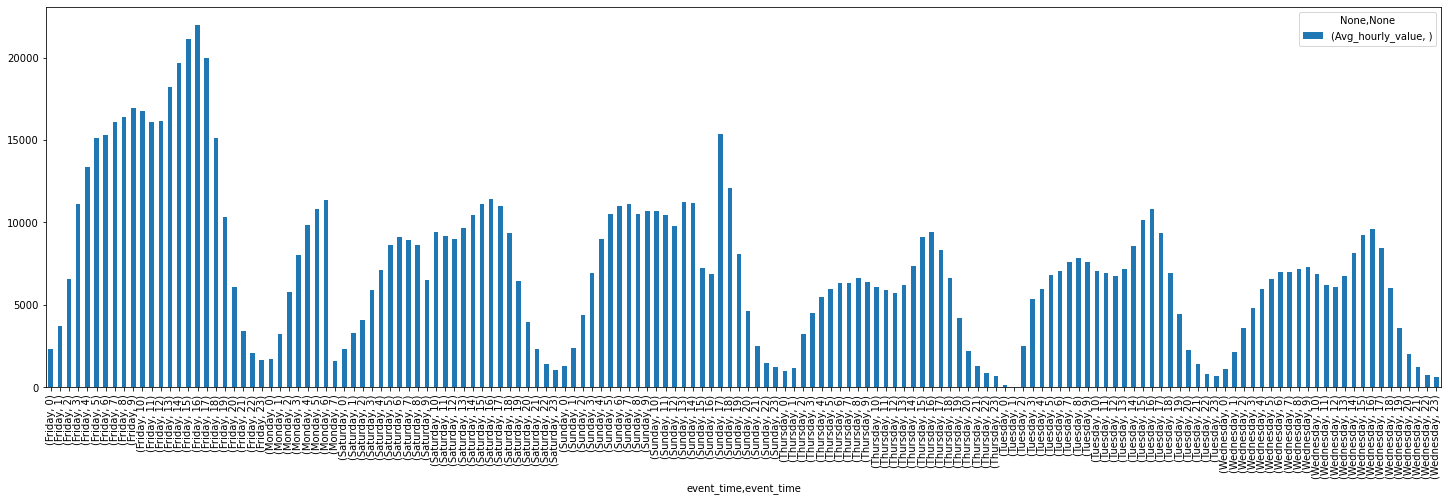

In [5]:
#Knowing which days of the week or even which hours of the day shoppers are likely to visit your online store and make a purchase may help you improve your strategies. 
#Create a plot that for each day of the week show the hourly average of visitors your store has.

temp_df = df[df['event_type'] == 'view']
temp_df['Value_is_one'] = temp_df.event_type.apply(lambda row:  1 if row == 'view' else 1)
temp_df_1 = temp_df.groupby([temp_df['event_time'].dt.day_name(),temp_df['event_time'].dt.hour]).\
        agg({'Value_is_one' :['sum']})

import calendar
from collections import Counter

cal = calendar.Calendar()
year = 2019
month = 10
count1 = Counter(d.strftime('%A') for d in cal.itermonthdates(year, month) if d.month==month)
year = 2019
month = 11
count2 =  Counter(d.strftime('%A') for d in cal.itermonthdates(year, month) if d.month==month)
days_name_count = dict(count1 + count2)

temp_df_1['Avg_hourly_value'] = temp_df_1.groupby(level=0, group_keys=False).apply(lambda x : x['Value_is_one']['sum']/days_name_count[x.index[0][0]])
temp_df_1 = temp_df_1.drop(('Value_is_one', 'sum'), axis = 1)
temp_df_1.plot.bar(figsize=(25,7))

**Again since our machine were not able to read all data it might not seen perfect but we have created a plot that for each day of the week shows the hourly average of visitors our store has. It would look just perfect if we would be able to read all data.**